In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [12]:
ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [3]:
def plot_sparsity(env_name, ents, clips, frac=0.1):
    with open(f"./shared/{env_name}_Wr.npy", 'rb') as f:
        Wr = np.load(f)
    with open(f"./shared/{env_name}_Wp.npy", 'rb') as f:
        Wp = np.load(f)
        
    assert len(Wr.shape) == len(Wp.shape) == 5  # (n_seeds, n_ent, n_clip, d_out, d_in)
    assert Wr.shape[1:3] == Wp.shape[1:3] == (len(ents), len(clips))
    print("Wr shape:", Wr.shape)
    print("Wp shape:", Wp.shape)

    # Abs
    Wr = np.abs(Wr)
    Wp = np.abs(Wp)
    
    Wr = np.reshape(Wr, (*Wr.shape[:-2], -1))
    Wp = np.reshape(Wp, (*Wp.shape[:-2], -1))
    assert Wr.shape[1:3] == Wp.shape[1:3] == (len(ents), len(clips))

    Wr = np.sort(Wr, axis=-1)
    Wp = np.sort(Wp, axis=-1)

    print("Max Wr:", np.max(np.mean(Wr, axis=0)))
    print("Max Wp:", np.max(np.mean(Wp, axis=0)))
    
    # Normalize
    Wr /= np.max(Wr, axis=-1, keepdims=True)
    Wp /= np.max(Wp, axis=-1, keepdims=True)

    k_r = int(frac*Wr.shape[-1])
    Wr = Wr[..., :k_r]
    k_p = int(frac*Wp.shape[-1])
    Wp = Wp[..., :k_p]
    
    Wr = np.mean(Wr, axis=0)
    Wp = np.mean(Wp, axis=0)
       
    print("\nAbs values of representation weight matrix")
    plt.figure(figsize=(24, 15))
    indices = range(Wr.shape[-1])
    for j in range(Wr.shape[0]):
        labels = []
        plt.subplot(2, 3, j+1)
        for k in range(Wr.shape[1]):
            sns.kdeplot(x=Wr[j, k, :])
            label = f"eps={clips[k] if clips[k]<1000 else None}"
            labels.append(label)
    
        plt.xlabel("Normalized weight value")
        plt.ylabel("Distribution")
        plt.legend(labels)
        plt.title(f"Ent. bonus={ents[j]}")
    plt.show()
    
#     print("\nAbs values of logit weight matrix")
#     plt.figure(figsize=(24, 15))
#     indices = range(Wp.shape[-1])
#     for j in range(Wp.shape[0]):
#         labels = []
#         plt.subplot(2, 3, j+1)
#         for k in range(Wp.shape[1]):
#             sns.kdeplot(x=Wp[j, k, :])
#             label = f"eps={clips[k] if clips[k]<1000 else None}"
#             labels.append(label)
    
#         plt.xlabel("Index")
#         plt.ylabel("Weight value")
#         plt.legend(labels)
#         plt.title(f"Ent. bonus={ents[j]}")
#     plt.show()
            
    return Wr, Wp

## 1. Acrobot

Wr shape: (8, 6, 7, 64, 64)
Wp shape: (8, 6, 7, 64, 3)
Max Wr: 2.3311603
Max Wp: 0.7949325

Abs values of representation weight matrix


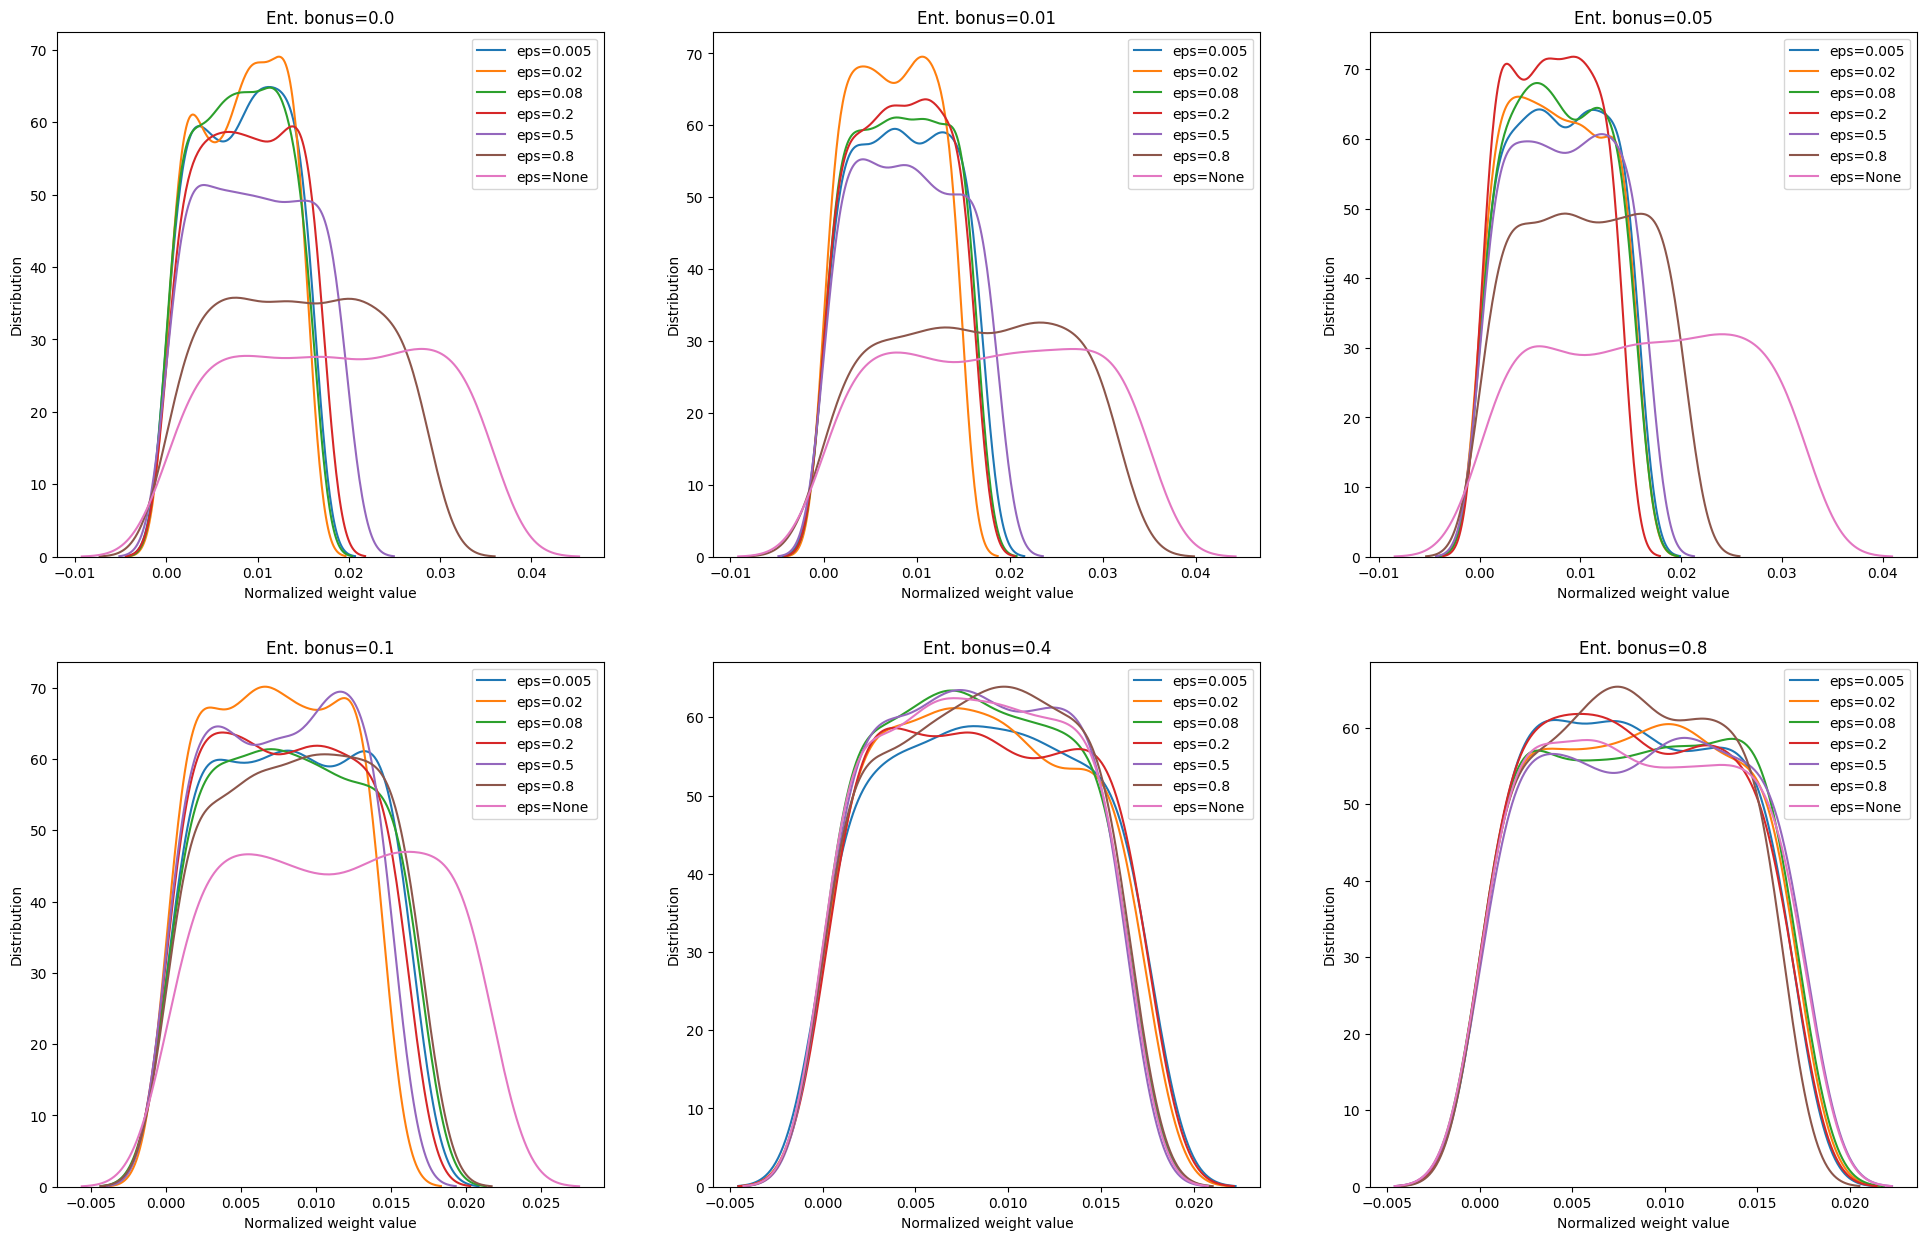

In [4]:
Wr, Wp = plot_sparsity("Acrobot-v1", ents, clips)

## 2. Asterix

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 5)
Max Wr: 1.8678097
Max Wp: 2.0703607

Abs values of representation weight matrix


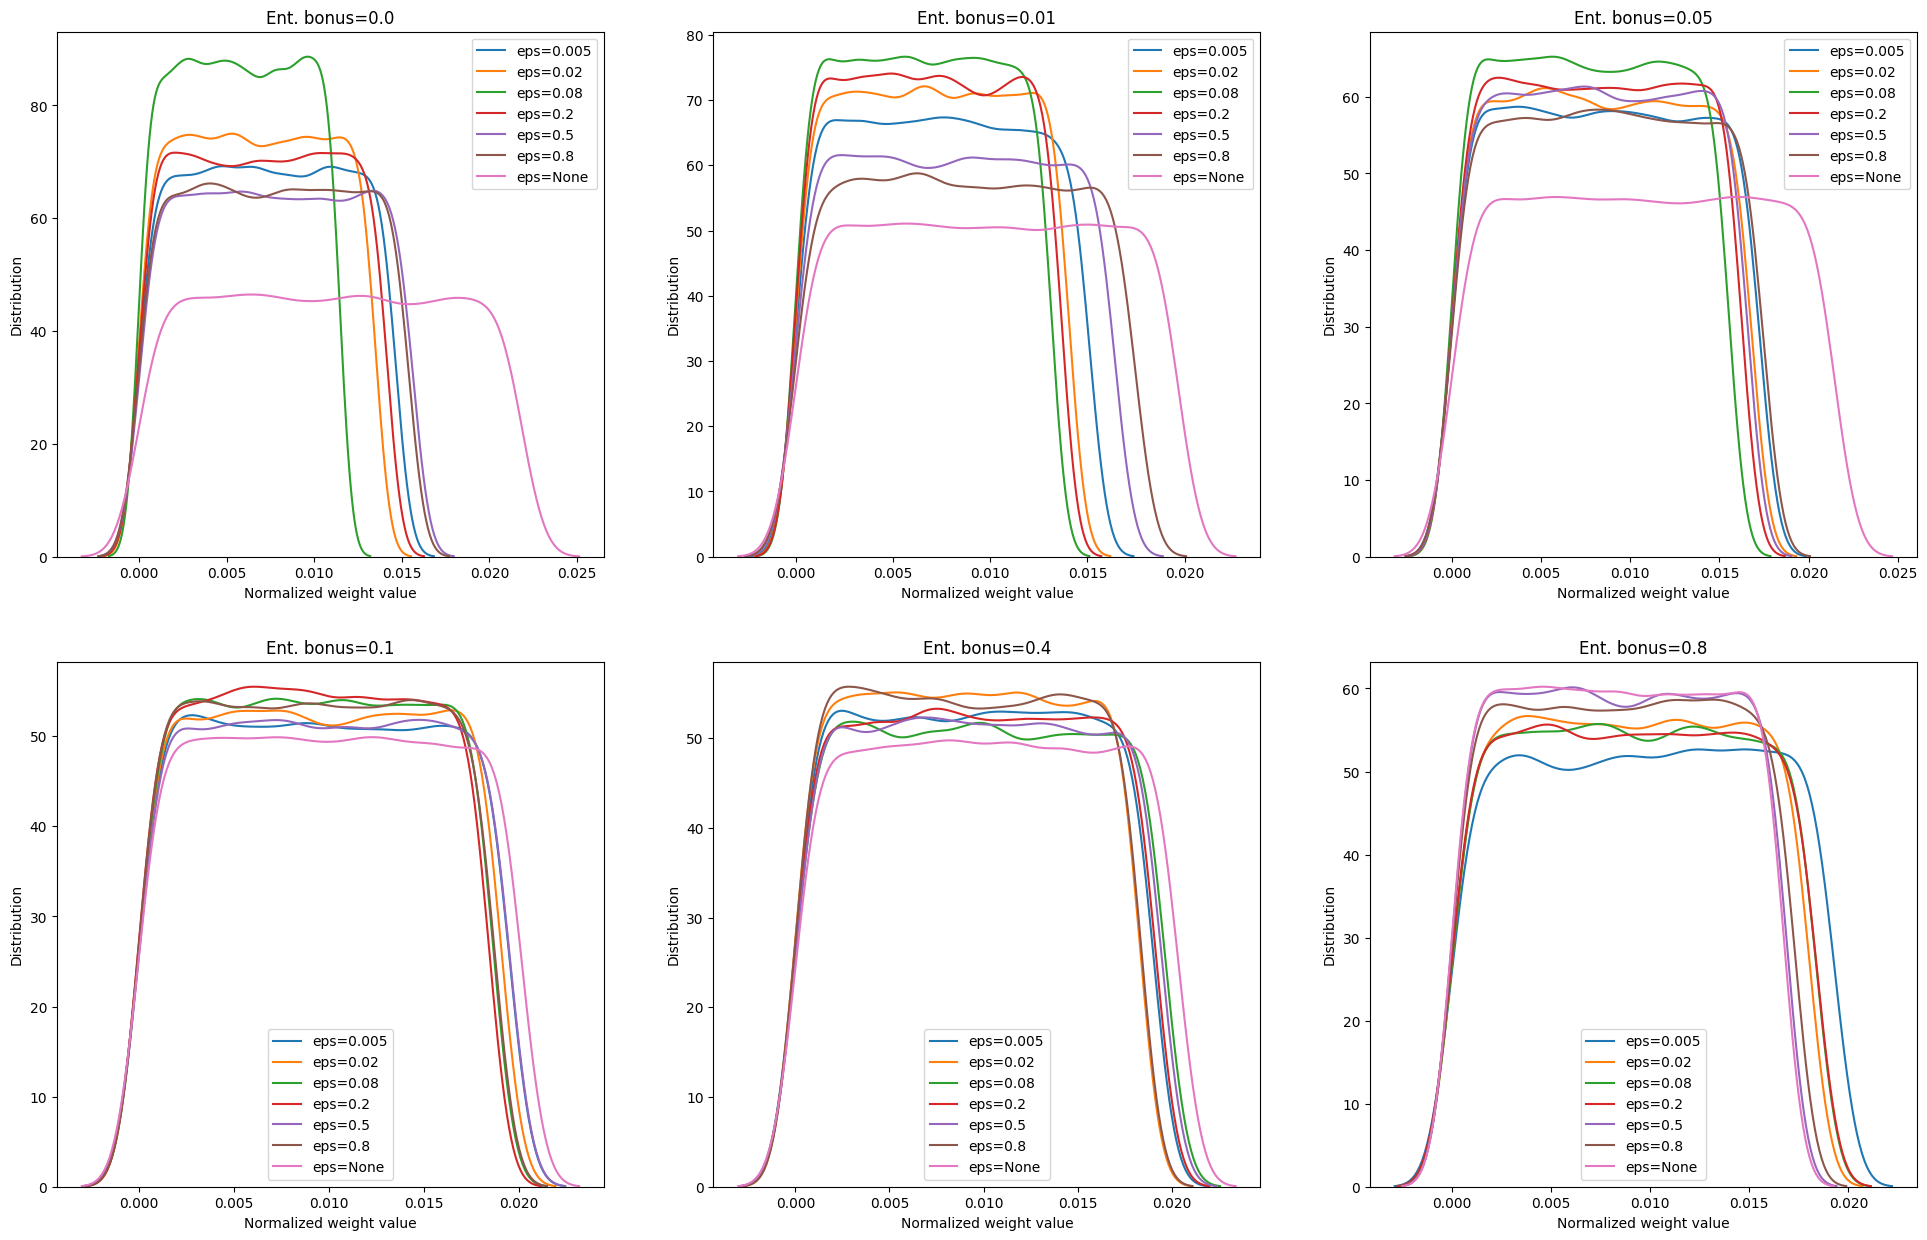

In [5]:
Wr, Wp = plot_sparsity("Asterix-MinAtar", ents, clips)

## 3. Breakout

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 3)
Max Wr: 4.332693
Max Wp: 2.560973

Abs values of representation weight matrix


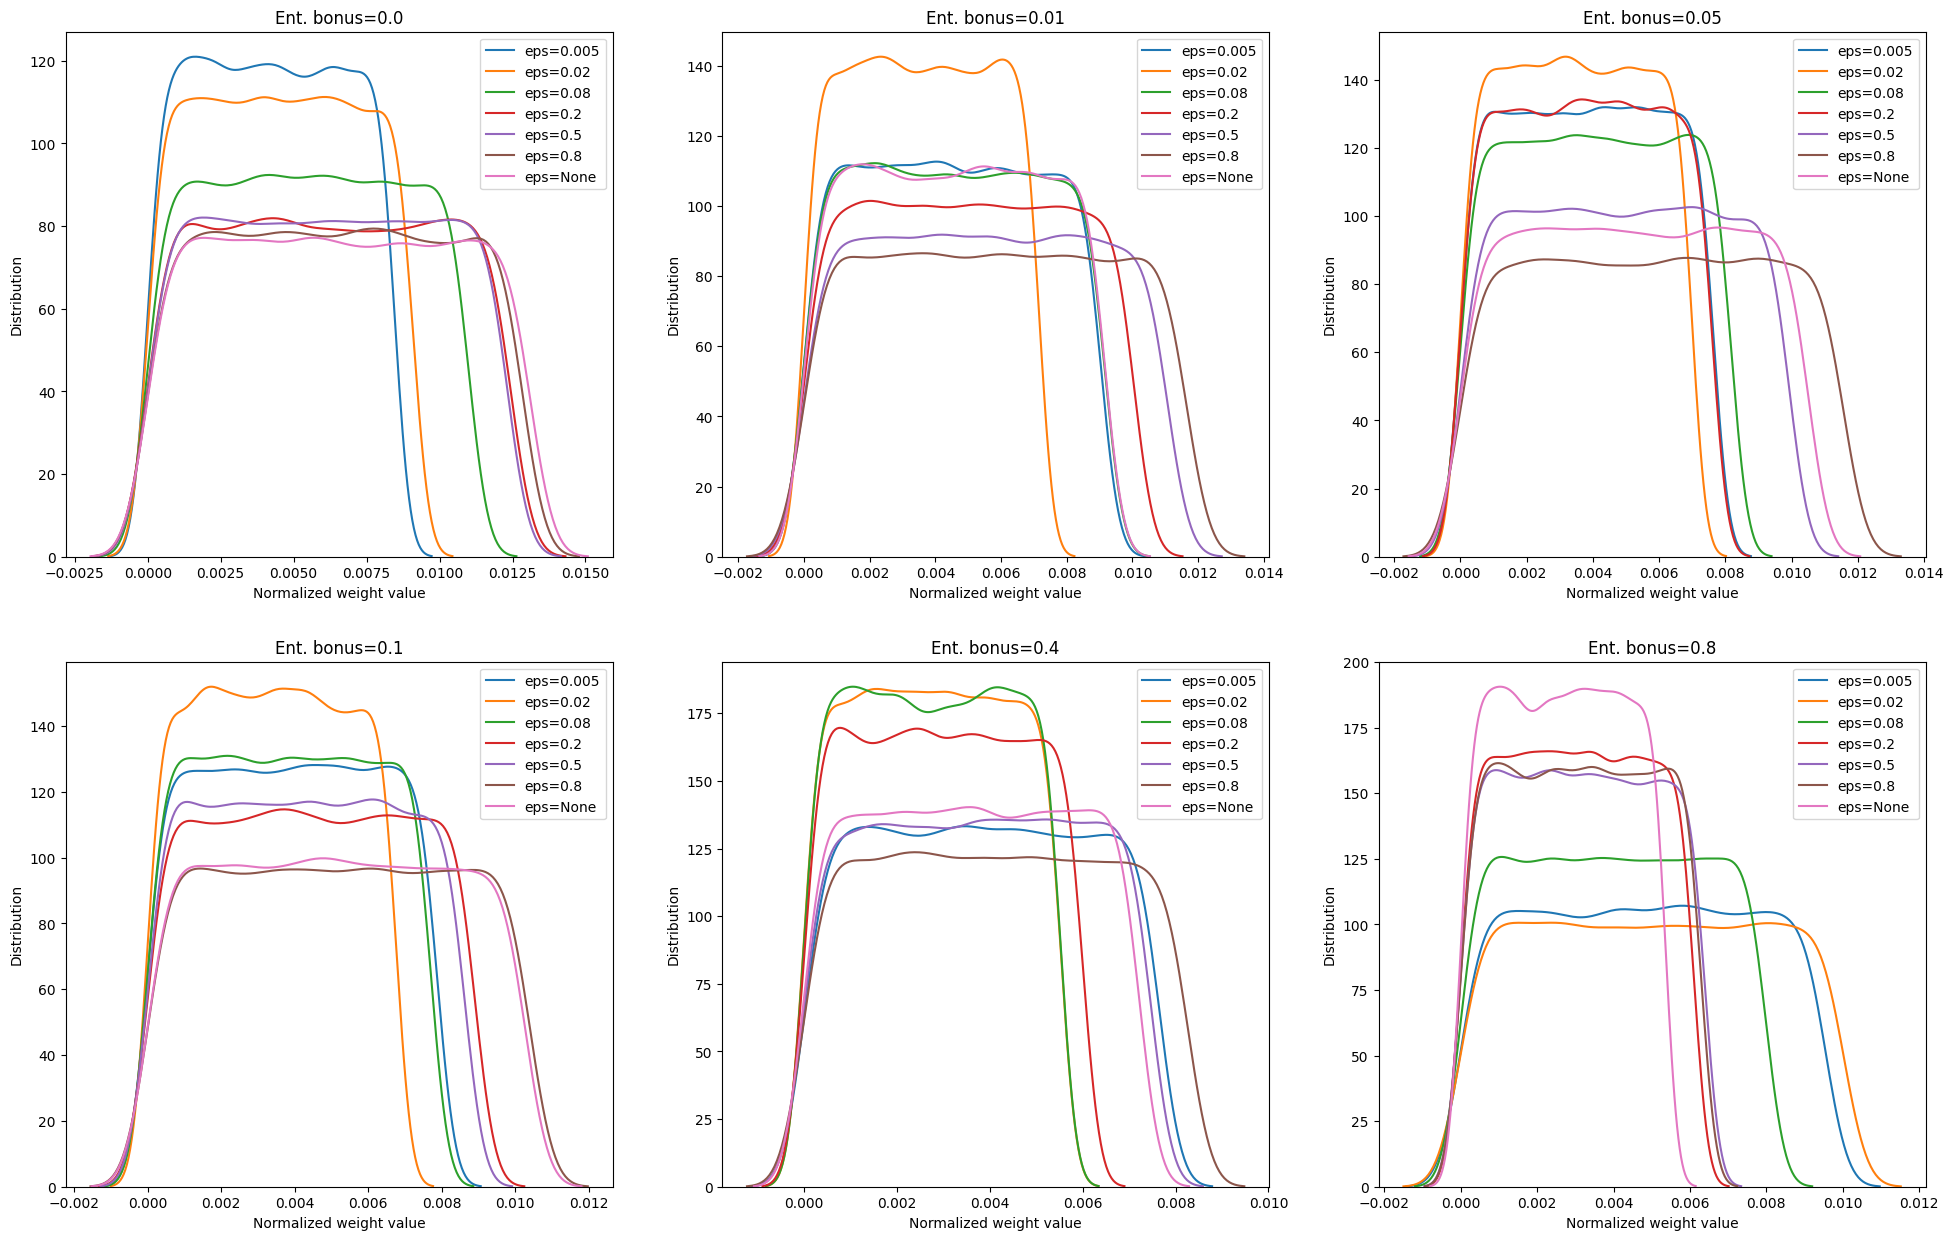

In [6]:
Wr, Wp = plot_sparsity("Breakout-MinAtar", ents, clips)

## 4. CartPole

Wr shape: (8, 6, 7, 64, 64)
Wp shape: (8, 6, 7, 64, 2)
Max Wr: 1.3209403
Max Wp: 0.74753076

Abs values of representation weight matrix


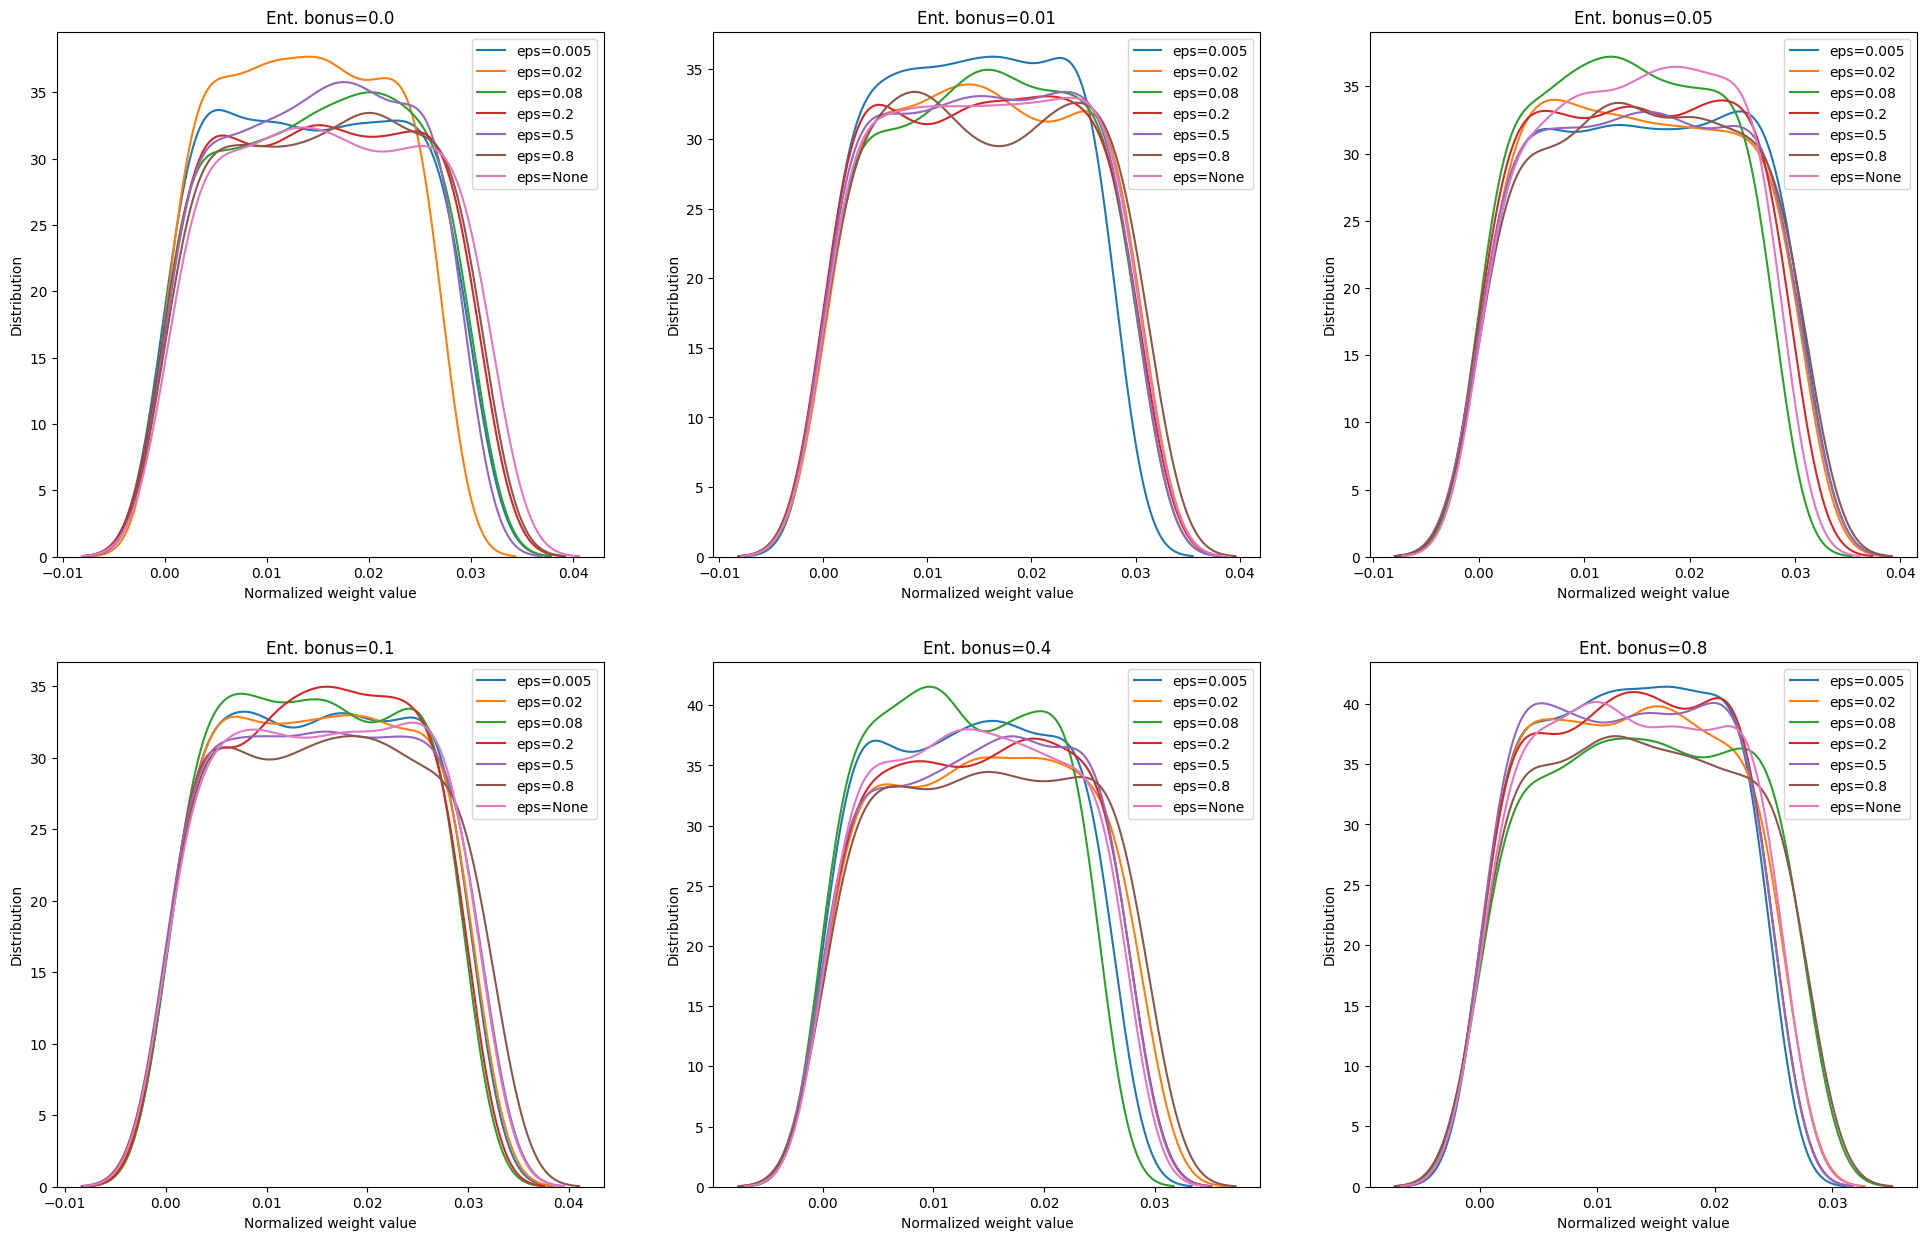

In [7]:
Wr, Wp = plot_sparsity("CartPole-v1", ents, clips)

## 5. Freeway

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 3)
Max Wr: 2.1257844
Max Wp: 1.4621155

Abs values of representation weight matrix


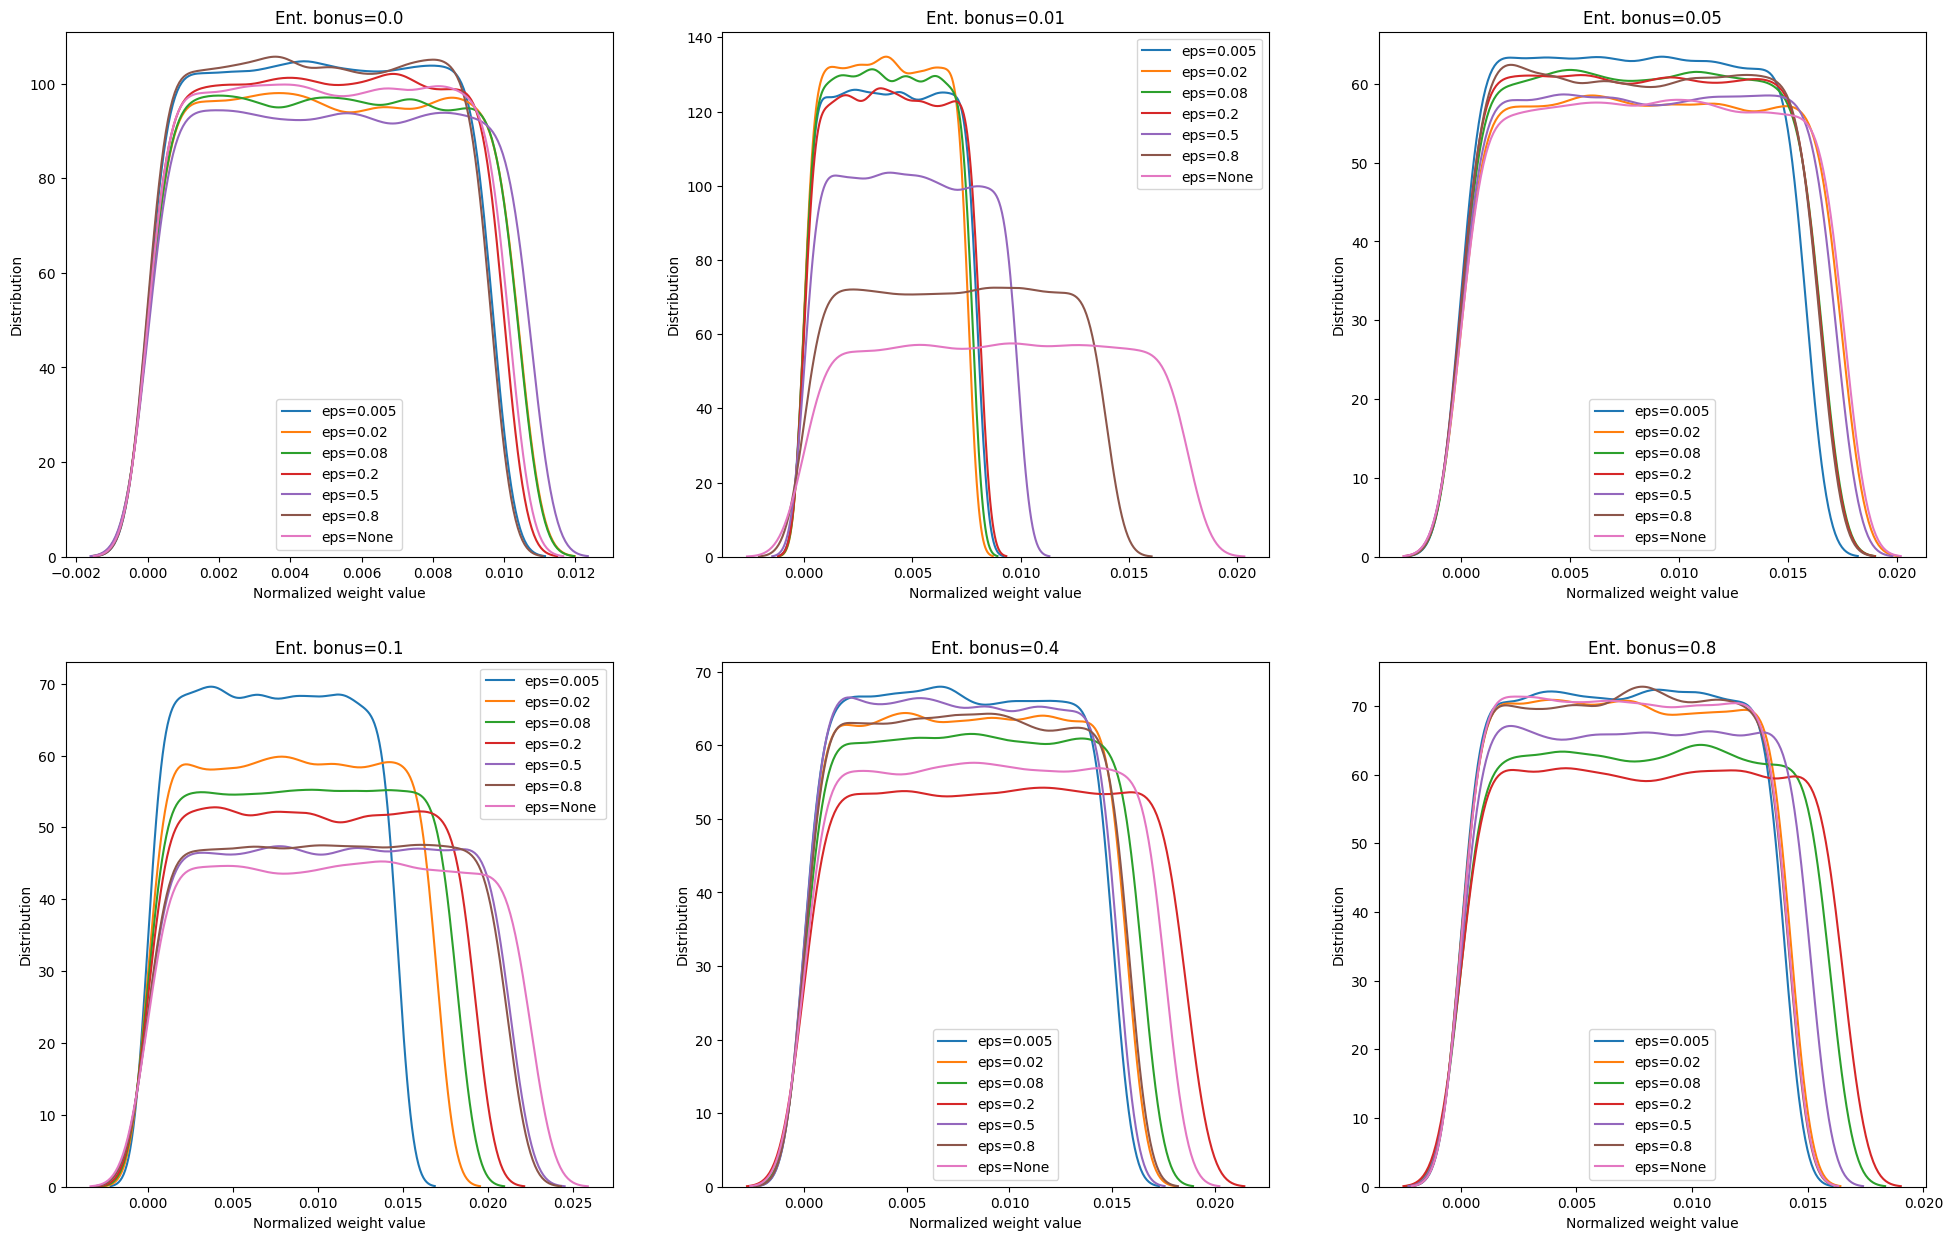

In [8]:
Wr, Wp = plot_sparsity("Freeway-MinAtar", ents, clips)

## 6. MountainCar

Wr shape: (8, 6, 7, 64, 64)
Wp shape: (8, 6, 7, 64, 3)
Max Wr: 35.424385
Max Wp: 8.574008

Abs values of representation weight matrix


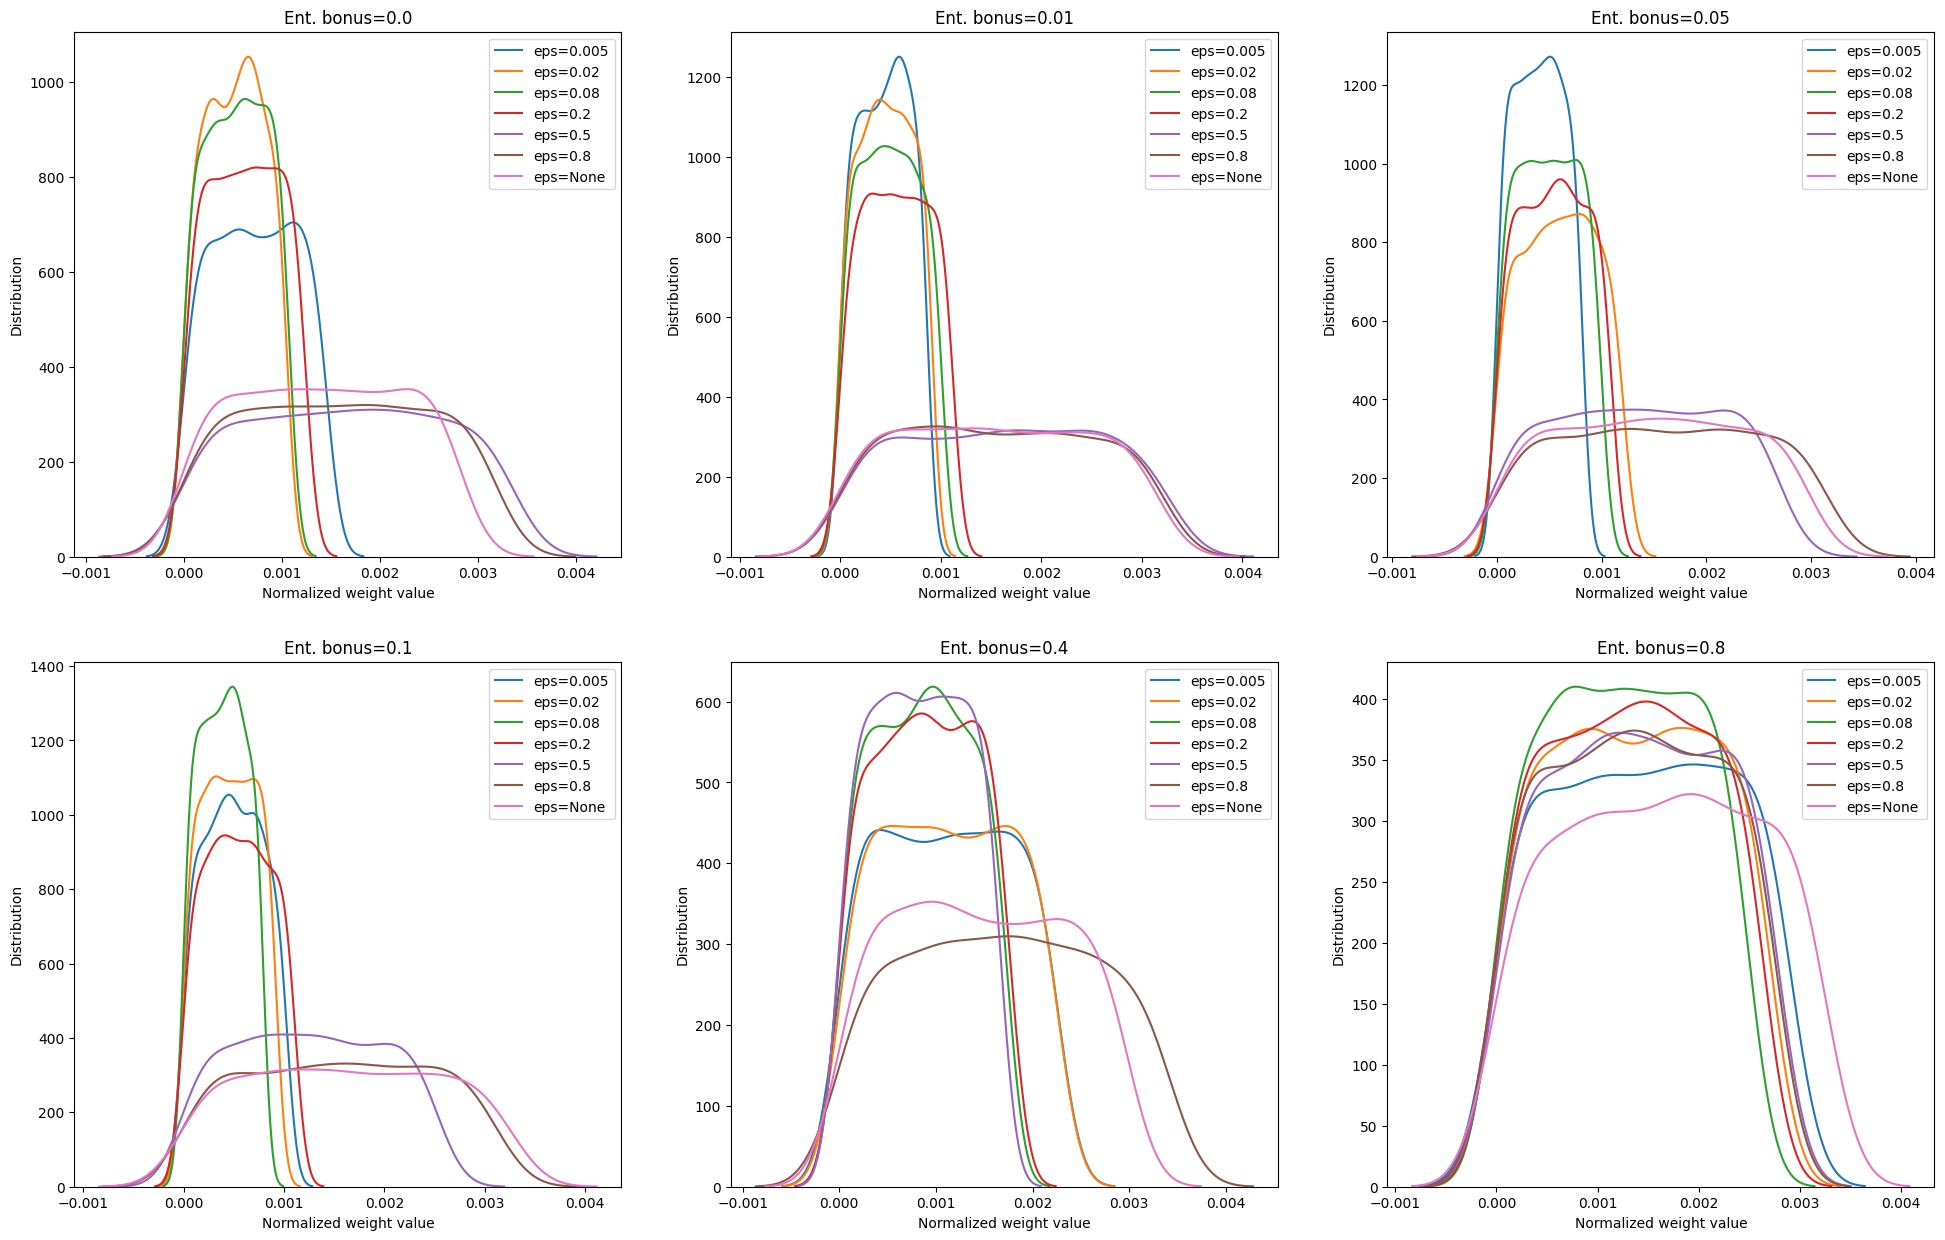

In [9]:
Wr, Wp = plot_sparsity("MountainCar-v0", ents, clips)

## 7. SpaceInvaders

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 4)
Max Wr: 2.5809436
Max Wp: 2.8717043

Abs values of representation weight matrix


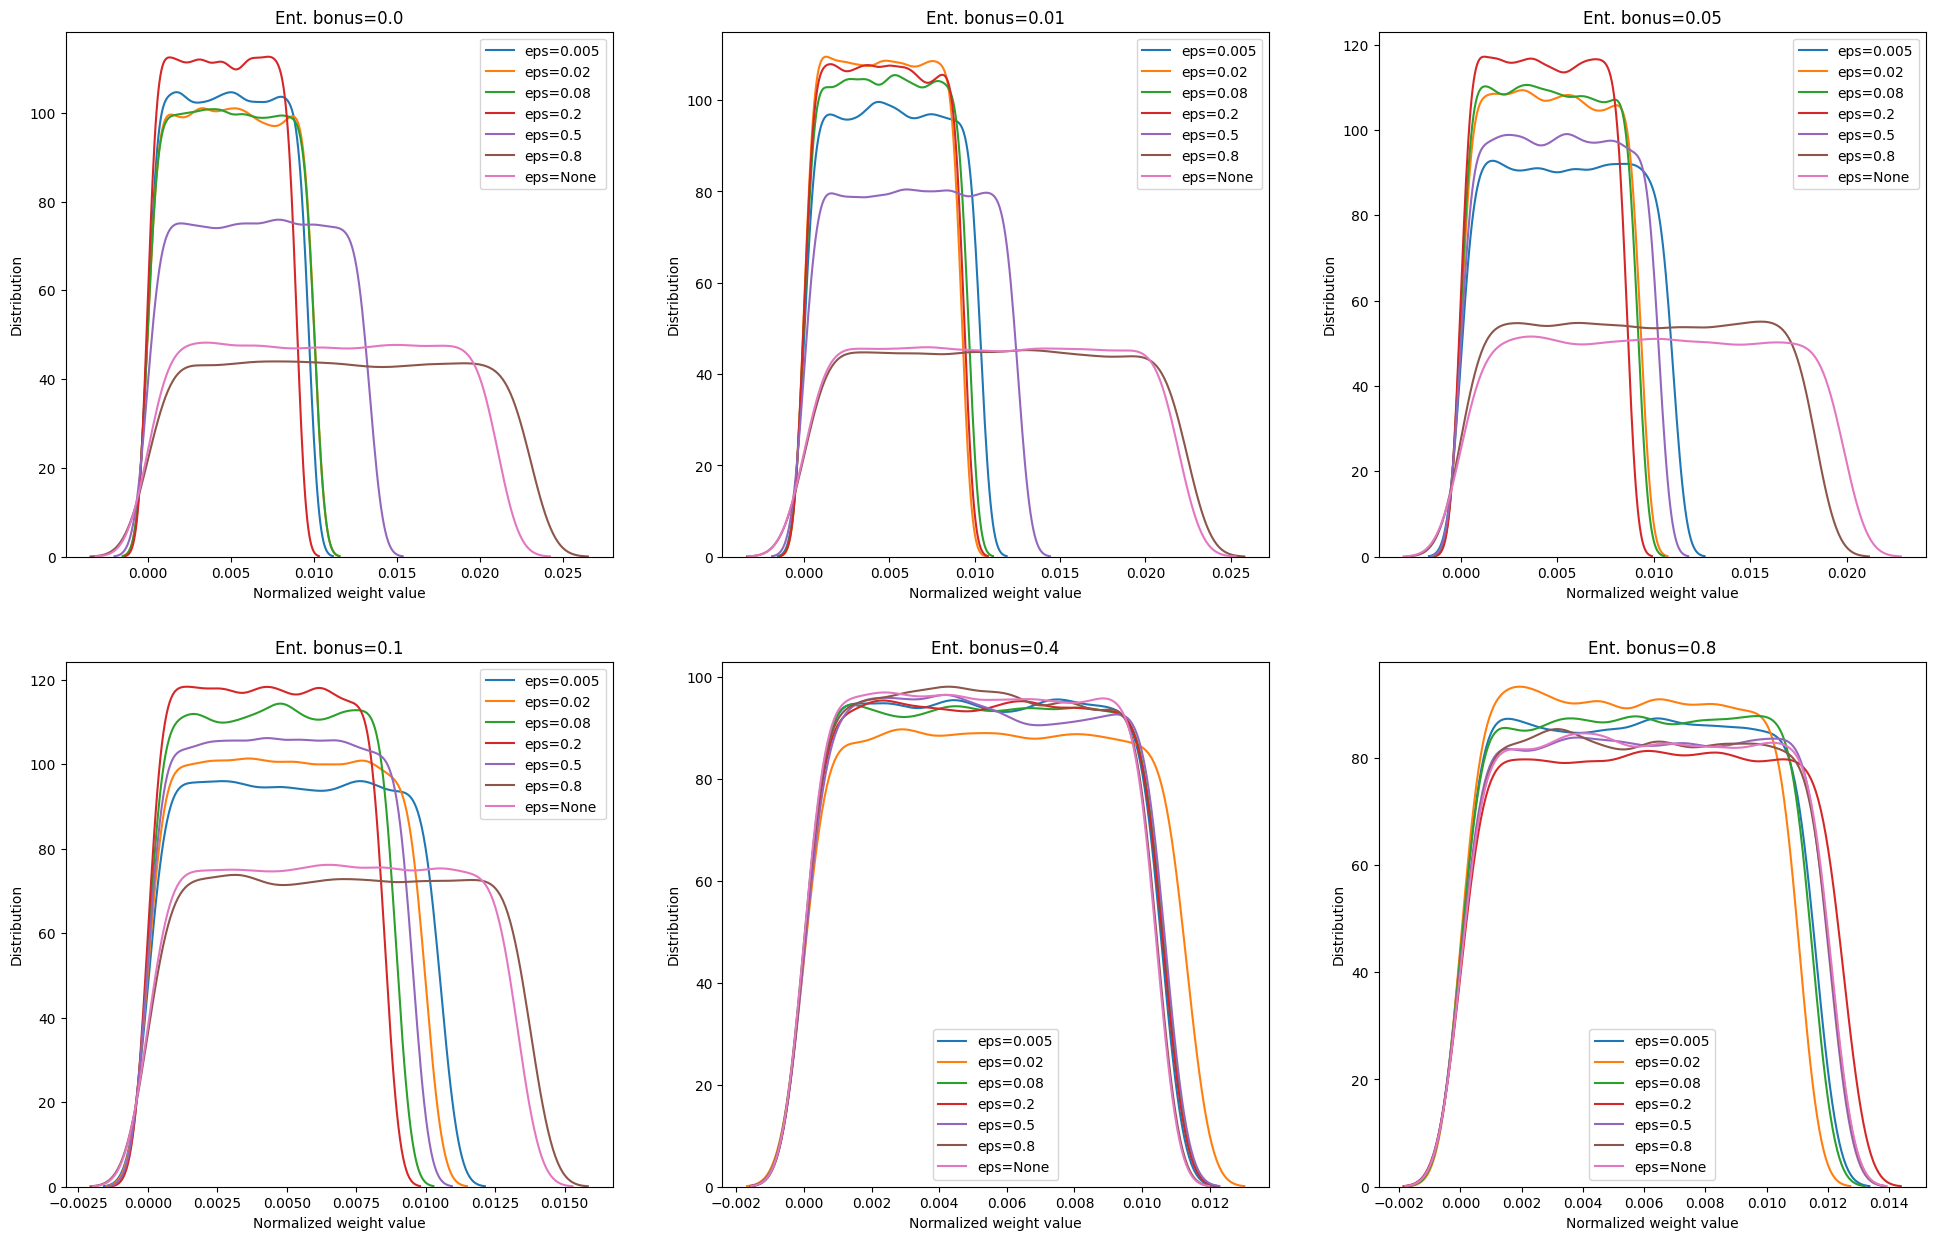

In [10]:
Wr, Wp = plot_sparsity("SpaceInvaders-MinAtar", ents, clips)